In [1]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import logging
from numpy import random
import gensim
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [2]:
df = pd.read_excel('wsd_data.xlsx')
df = df[pd.notnull(df['CATEGORY'])]
#print(df.head(3))
print(df['SENTENCE'].apply(lambda x: len(x.split(' '))).sum())

4729


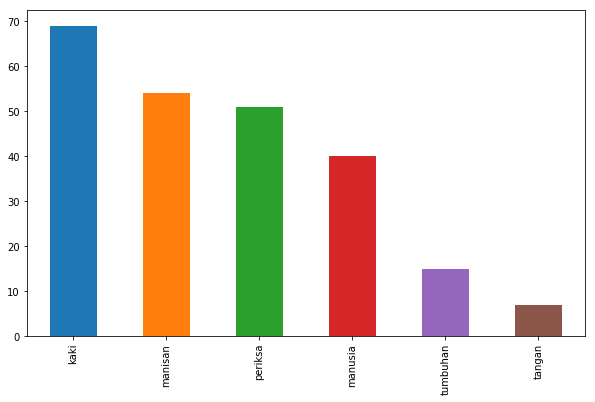

In [3]:
my_tags = ['manisan','manusia','kaki','tangan','periksa','tumbuhan']
plt.figure(figsize=(10,6))
df.CATEGORY.value_counts().plot(kind='bar');

Train on 148 samples, validate on 17 samples
Epoch 1/20
148/148 [==============================] - 1s 8ms/step - loss: 1.7664 - acc: 0.2297 - val_loss: 1.6206 - val_acc: 0.4706
Epoch 2/20
148/148 [==============================] - 0s 1ms/step - loss: 1.3556 - acc: 0.7838 - val_loss: 1.3694 - val_acc: 0.7059
Epoch 3/20
148/148 [==============================] - 0s 1ms/step - loss: 1.0164 - acc: 0.8851 - val_loss: 1.1545 - val_acc: 0.7647
Epoch 4/20
148/148 [==============================] - 0s 1ms/step - loss: 0.7588 - acc: 0.9257 - val_loss: 0.9757 - val_acc: 0.7647
Epoch 5/20
148/148 [==============================] - 0s 1ms/step - loss: 0.5535 - acc: 0.9459 - val_loss: 0.8245 - val_acc: 0.7647
Epoch 6/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4007 - acc: 0.9595 - val_loss: 0.7096 - val_acc: 0.8235
Epoch 7/20
148/148 [==============================] - 0s 1ms/step - loss: 0.2950 - acc: 0.9730 - val_loss: 0.6120 - val_acc: 0.8824
Epoch 8/20
148/148 [===========

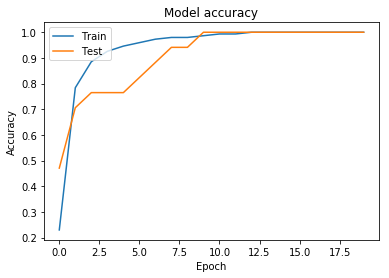

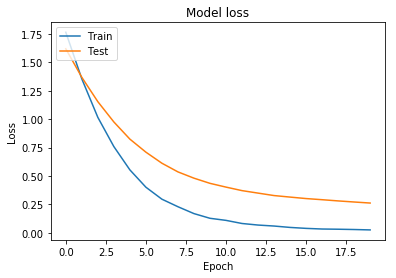

In [7]:
X = df.SENTENCE
y = df.CATEGORY
train_posts, test_posts, train_tags, test_tags = train_test_split(X, y, test_size=0.3, random_state = 42)

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
                                   split=' ', char_level=False, oov_token=None, document_count=0)
#tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 16 #32
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

71/71 [==============================] - 0s 256us/step
Test accuracy: 0.8591549304169668


In [ ]:
labels = encoder.classes_

with open("wsd_test.txt", "r") as ins:
    x_data = []
    for line in ins:
        x_data.append(line)

x_data_series = pd.Series(x_data)
x_tokenized = tokenize.texts_to_matrix(x_data_series, mode='tfidf')

i=0
for x_t in x_tokenized:
    prediction = model.predict(np.array([x_t]))
    predicted_label = labels[np.argmax(prediction[0])]
    print("Sentence ->", x_data_series[i], "Predicted label: " + predicted_label, "\n")
    i += 1

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')